# Loan Eligibiity Prediction

### Datasets: 
- Train: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv
- Test: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=test_Y3wMUE5_7gLdaTN.csv


### Variables:

- Loan ID : Unique Loan ID
- Gender : Male/ Female
- Married : Applicant married (Y/N)
- Dependents : Number of dependents 
- Education : Applicant Education (Graduate/ Under Graduate)
- Self Employed : Self employed (Y/N)
- Applicant Income : Applicant income
- Coapplicant Income : Coapplicant income
- Loan Amount : Loan amount in thousands of dollars
- Loan Amount Term : Term of loan in months
- Credit History : credit history meets guidelines yes or no
- Property Area : Urban/ Semi Urban/ Rural

- Loan Status : Loan approved (Y/N) this is the label (prediction variable)

Author: Steven Ponce

Date: Feb 2021

# Import Models

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df = pd.read_csv("loan_prediction_train.csv")

In [3]:
df.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Descriptive Statistics

In [4]:
df.describe()

,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self Employed       582 non-null    object 
 6   Applicant Income    614 non-null    int64  
 7   Coapplicant Income  614 non-null    float64
 8   Loan Amount         592 non-null    float64
 9   Loan Amount Term    600 non-null    float64
 10  Credit History      564 non-null    float64
 11  Property Area       614 non-null    object 
 12  Loan Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the data

In [6]:
# Check for null values
df.isnull().sum()

Loan ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self Employed         32
Applicant Income       0
Coapplicant Income     0
Loan Amount           22
Loan Amount Term      14
Credit History        50
Property Area          0
Loan Status            0
dtype: int64

In [7]:
# fill the missing values for numerical terms - mean
df['Loan Amount'] = df['Loan Amount'].fillna(df['Loan Amount'].mean())
df['Loan Amount Term'] = df['Loan Amount Term'].fillna(df['Loan Amount Term'].mean())
df['Credit History'] = df['Credit History'].fillna(df['Credit History'].mean())
df.isnull().sum()

Loan ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self Employed         32
Applicant Income       0
Coapplicant Income     0
Loan Amount            0
Loan Amount Term       0
Credit History         0
Property Area          0
Loan Status            0
dtype: int64

In [8]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self Employed'] = df["Self Employed"].fillna(df['Self Employed'].mode()[0])
df.isnull().sum()


Loan ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self Employed         0
Applicant Income      0
Coapplicant Income    0
Loan Amount           0
Loan Amount Term      0
Credit History        0
Property Area         0
Loan Status           0
dtype: int64

# Exploratory Data Analysis (EDA)

In [9]:
# categorical attributes
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [10]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [11]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
df['Self Employed'].value_counts()

No     532
Yes     82
Name: Self Employed, dtype: int64

In [14]:
df['Property Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property Area, dtype: int64

In [15]:
df['Loan Status'].value_counts()

Y    422
N    192
Name: Loan Status, dtype: int64

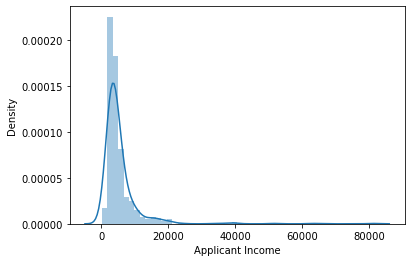

In [16]:
# numerical attributes visualization
sns.distplot(df["Applicant Income"])
plt.show()

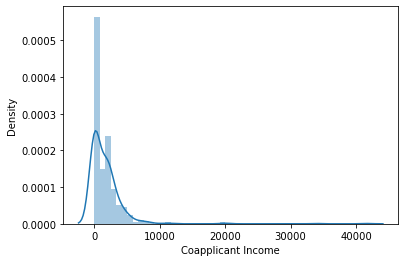

In [17]:
sns.distplot(df["Coapplicant Income"])
plt.show()

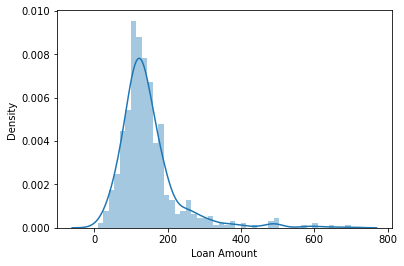

In [18]:
sns.distplot(df["Loan Amount"])
plt.show()

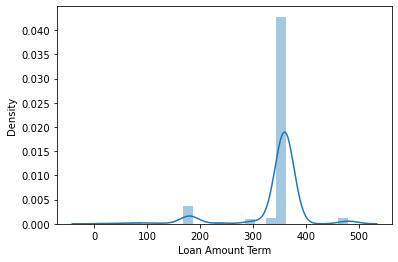

In [19]:
sns.distplot(df['Loan Amount Term'])
plt.show()

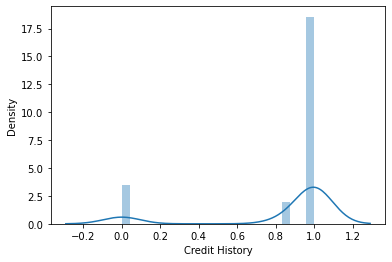

In [20]:
sns.distplot(df['Credit History'])
plt.show()

# Calculated column - total income

In [21]:
df['Total Income'] = df['Applicant Income'] + df['Coapplicant Income']
df.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status,Total Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


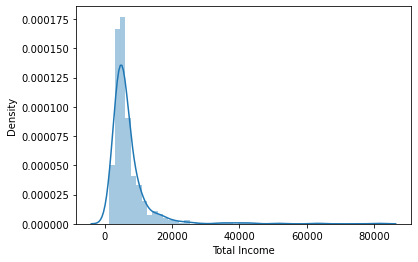

In [22]:
sns.distplot(df['Total Income'])
plt.show()

# Log Transformation

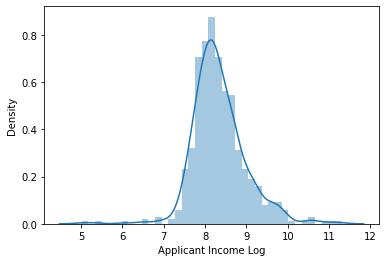

In [23]:
# log transformation - Applicant Income
df['Applicant Income Log'] = np.log(df["Applicant Income"])
sns.distplot(df["Applicant Income Log"])
plt.show()

In [24]:
# log transformation - Coapplication Income
df['Coapplicant Income Log'] = np.log(df['Coapplicant Income'])
plt.show()

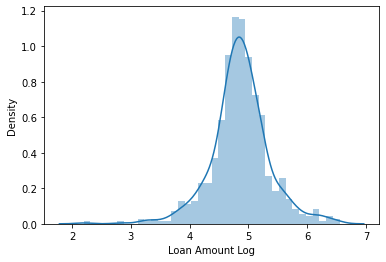

In [25]:
# log transformation - Loan Amount
df['Loan Amount Log'] = np.log(df["Loan Amount"])
sns.distplot(df["Loan Amount Log"])
plt.show()

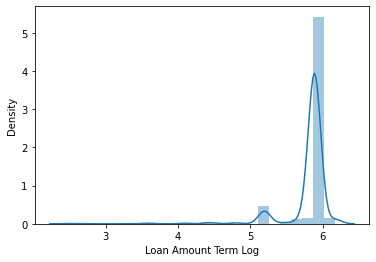

In [26]:
# log transformation - Loan Amount Term
df['Loan Amount Term Log'] = np.log(df["Loan Amount Term"])
sns.distplot(df["Loan Amount Term Log"])
plt.show()

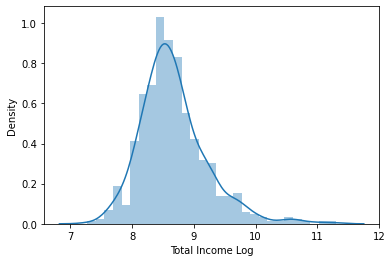

In [27]:
# log transformation - Total Income
df['Total Income Log'] = np.log(df["Total Income"])
sns.distplot(df["Total Income Log"])
plt.show()

# Correlation Matrix

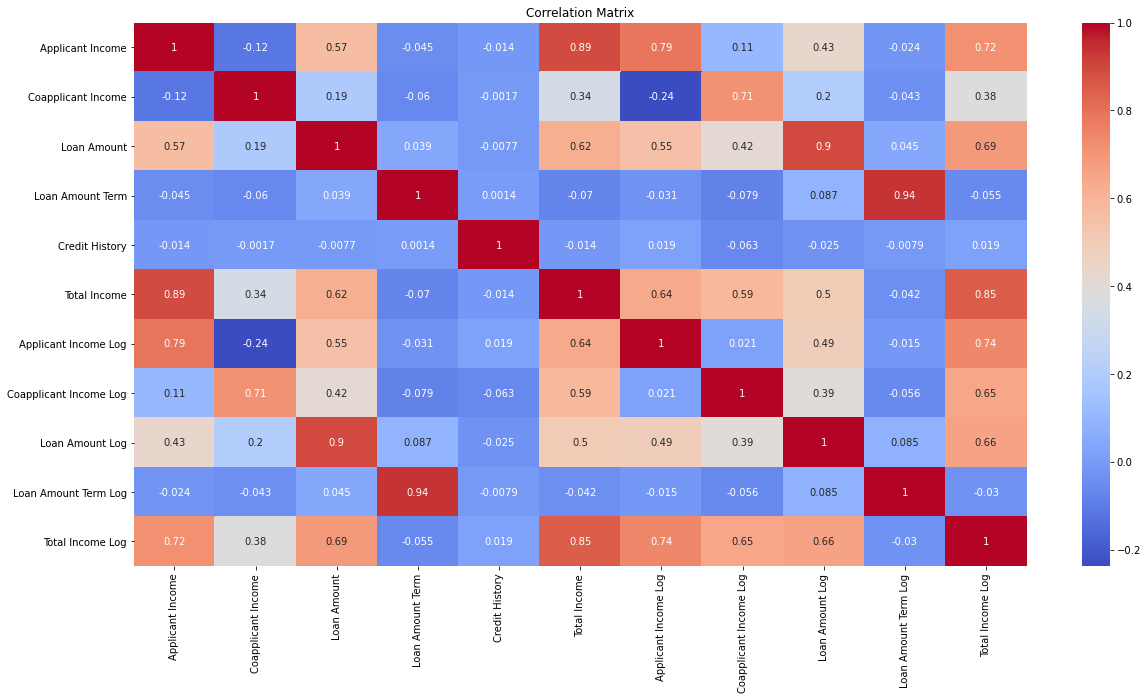

In [28]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
df.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status,Total Income,Applicant Income Log,Coapplicant Income Log,Loan Amount Log,Loan Amount Term Log,Total Income Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [30]:
# drop unnecessary columns
cols = ['Applicant Income', 'Coapplicant Income', "Loan Amount", "Loan Amount Term", "Total Income", 'Loan ID', 'Coapplicant Income Log']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self Employed,Credit History,Property Area,Loan Status,Applicant Income Log,Loan Amount Log,Loan Amount Term Log,Total Income Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [31]:
# Convert string to integer (Label Encoding)

from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self Employed',"Property Area","Loan Status","Dependents"]
encoder = LabelEncoder()
for col in cols:
    df[col] = encoder.fit_transform(df[col])
    

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self Employed,Credit History,Property Area,Loan Status,Applicant Income Log,Loan Amount Log,Loan Amount Term Log,Total Income Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Splitting the data

In [33]:
X = df.drop(columns = ['Loan Status'], axis = 1)
y = df['Loan Status']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Model training

In [35]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # train the model
    model.fit(x_train, y_train)
    print(f'Accuracy: {model.score(x_test, y_test) * 100:.2f} %')
    
    # cross-validation
    score = cross_val_score(model, x, y, cv=5)
    print(f'CV score: {np.mean(score) * 100:.2f} %')

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 77.27 %
CV score: 80.95 %


# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 72.73 %
CV score: 71.50 %


# RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 77.92 %
CV score: 78.50 %


# ExtraTreesClassifier

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 73.38 %
CV score: 77.53 %


# LightGMB

In [40]:
import lightgbm 
model = lightgbm.LGBMClassifier()
classify(model, X, y)

Accuracy: 74.68 %
CV score: 76.55 %


# Results Summary

#### Logistic Regression
- Accuracy: 77.27 %
- CV score: 80.95 %

#### Decision Tree Classifier:
- Accuracy: 71.43 %
- CV score: 71.34 %

#### RandomForestClassifier:   *
- Accuracy: 77.92 %
- CV score: 78.67 %

#### ExtraTreesClassifier:
- Accuracy: 73.38 %
- CV score: 77.53 %

#### LightGMB:
- Accuracy: 74.68 %
- CV score: 76.55 %

In [41]:
# Hyperparameter tuning for ML models
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=None, max_features='auto')
classify(model, X, y)

Accuracy: 77.27 %
CV score: 79.81 %


# Confusion Matrix

In [42]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)

In [44]:
matrix

array([[24, 30],
       [ 2, 98]], dtype=int64)

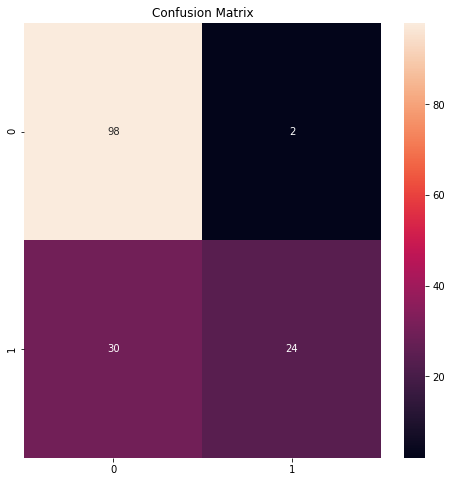

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True)
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])

plt.title('Confusion Matrix')  
plt.show()

# Confusion Matrix Analysis

In [51]:
# Defining CM variables
TN = 98
FP = 2
FN = 30
TP = 24

Total_row_1 = TN + FP
Total_row_2 = FN + TP
Total_col_1 = TN + FN
Total_col_2 = FP + TP

Overall_Total = TN + FP + FN + TP 

In [54]:
# Total Accurcy
Total_Accuracy = (TP+TN) / Overall_Total
print(f'Total Accuracy: {(Total_Accuracy) * 100:.2f} %')

Total Accuracy: 79.22 %


In [55]:
# Misclassification Rate
Misclass_Rate = (FP+FN)/ Overall_Total
print(f'Misclasification Rate: {(Misclass_Rate) * 100:.2f} %')

Misclasification Rate: 20.78 %


In [56]:
# True Positive or Recall
Recall = (TP)/ Total_row_2
print(f'Recall: {(Recall) * 100:.2f} %')

Recall: 44.44 %


In [57]:
# False Positive Rate
FPR = (FP)/ Total_row_1
print(f'False Positive Rate: {(FPR) * 100:.2f} %')

False Positive Rate: 2.00 %


In [59]:
# True Negative Rate
TNR = (TN)/ Total_row_1
print(f'True Negative Rate: {(TNR) * 100:.2f} %')

True Negative Rate: 98.00 %


In [60]:
# Precision
Precision = (TP)/ Total_col_2
print(f'Recall: {(Precision) * 100:.2f} %')

Recall: 92.31 %


In [61]:
# Actual Prevalence
Prevalence = Total_row_2 / Overall_Total
print(f'Actual Prevalence: {(Prevalence) * 100:.2f} %')

Actual Prevalence: 35.06 %


In [62]:
# F1 Score
F1 = 2 * ((Precision * Recall) / (Precision + Recall))
print(f'F1 Score: {(F1) * 100:.2f} %')

F1 Score: 60.00 %
